# Vacuum Rabi Oscillations Using QuTiP: Computational Supplement

---

**Associated Publication:** *Tutorial on Superconducting Quantum Circuits: From Basics to Applications*

**Journal:** Brazilian Journal of Physics (Special Issue: 100 years of Quantum Mechanics, 2025)

**Authors:**
- Denys Derlian Carvalho Brito ([ORCID](https://orcid.org/0009-0007-1669-0340))  
  *Instituto Tecnológico de Aeronáutica, São Paulo, Brasil*
  
- Fernando Valadares ([ORCID](https://orcid.org/0000-0002-7961-2215))  
  *Centre for Quantum Technologies, National University of Singapore*
  
- André Jorge Carvalho Chaves ([ORCID](https://orcid.org/0000-0003-1381-8568)) - *Corresponding Author*  
  *Instituto Tecnológico de Aeronáutica, São Paulo, Brasil*

**Status:** Data Availability Material & Computational Supplement

---

## About This Notebook

This Jupyter notebook provides a comprehensive computational exploration of vacuum Rabi oscillations in superconducting quantum circuits, extending beyond the theoretical treatment presented in the associated article. The implementation uses the Quantum Toolbox in Python (QuTiP) to simulate transmon-resonator coupling dynamics under various experimental conditions.

**Audience & Purpose:** This notebook is designed for researchers, reproducibility reviewers, and graduate students seeking to reproduce the computational results, verify the theoretical predictions, and extend the simulations with their own parameters.

---

## Computational Environment

**Python Version Required:** 3.8 or higher (tested with 3.10)

**Core Dependencies:**
- QuTiP (Quantum Toolbox in Python) >= 4.7.0
- NumPy >= 1.21.0
- Matplotlib >= 3.5.0
- SciPy >= 1.7.0

**Installation:**
```bash
pip install -r requirements.txt
```

See `requirements.txt` for exact pinned versions to ensure reproducibility.

---

## Quick Start

1. Ensure Python 3.8+ is installed
2. Install dependencies: `pip install -r requirements.txt`
3. Run cells sequentially from top to bottom
4. Key results are generated in the "System Evolution" section
5. Figures are saved to `./images/` directory (created automatically)

---

## Notebook Structure

1. **Initial States**: System setup and parameter definitions
2. **Transmon Excitation**: Implementation of excitation protocols
3. **System Evolution**: Analysis under various scenarios:
   - No resonance
   - Different frequencies
   - No dissipative interactions
   - Dissipative interactions
   - Frequency detuning
   - Non-zero temperature effects

---

# Tutorial on Superconducting Quantum Circuits
---
## Application Example - Rabi Oscillations
---

### Experimental Protocol
---
This experimental protocol of the Rabi Oscillations described in this notebook is within the framework of Quantum Circuits Electrodynamics, particularly in the realm of Transmon-Resonator coupling. Hence, controlled manipulation of quantum states and the observation of their effects are treated as follows:

1. **Initial States**: The protocol initiates with two key components, a "resonator" and a "transmon", both in their lowest energy states and separated by a significant frequency difference. This likely implies that both systems are in their ground states, with the transmon representing a specific type of superconducting qubit (two-level system);
   
2. **Transmon Excitation**: The transmon is excited using a pulse. This excitation can be executed in two ways: either through a simple matrix simulation to mimic the excitation process or by applying a voltage pulse. The latter method is noted as more intriguing as it involves utilizing the drive's Hamiltonian, likely indicating a controlled manipulation of the system's energy;

3. **System analysis**: Given the preparation of the system and the definition of the initial parameters, its behavior analyzed within specific frameworks:

    3.1 **System evolution with no resonance**: In this case, the coupling strength is set to zero;

    3.2 **System evolution with different frequencies**: The frequencies are set to be away from each other; 
    
    3.3 **System evolution with no dissipative interaction**: The ideal scenario is set, and no collapse operators are in the game. In other words, the system does not interact with an environment and, therefore, there is no energy dissipation;

    3.4 **System evolution with dissipative interaction**: The collapse operators are set, and the energy dissipation is accountable for this scenario;

    3.5 **System evolution with frequency detuning**: The frequency of the transmon is altered to become close to the resonator's frequency, potentially enabling interaction between the two systems. A variable "detuning" is set, indicating manipulation of the frequency difference between the transmon and the resonator. With both circuits now at similar frequencies, they interact resonantly for a variable duration. During this interaction period, the interplay between the transmon and the resonator is explored;

    3.6 **System evolution with non-zero temperature**: The behavior of the system is observed when there is energy dissipation at a non-zero temperature scenario.
    
 4. **Measurement and Final State**: Following the interaction at each scenario, the measurements are made for the occupation probability of each state for the cavity and the qubit. This measurement likely involves observing and recording any changes or effects caused by the interaction.

---

## Initial States
---

### Libraries imports

In [ ]:
"""
Library Imports for Quantum Circuit Simulation

This cell imports the essential libraries for simulating quantum systems:
- qutip: Quantum Toolbox in Python for quantum mechanics simulations
- numpy: Numerical computing and array operations
- matplotlib: Plotting and visualization
- scipy.signal: Signal processing for peak detection in oscillations
"""

# Quantum mechanics simulation framework
from qutip import *

# Numerical computing
import numpy as np

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt

# Signal processing for analyzing oscillation patterns
from scipy.signal import find_peaks

### Transmon-Resonator coupling
#### Definition of the initial parameters
The description of the system is based upon the transmon-resonator coupling. Given that, the definition of the parameters includes the resonator as a cavity coupled to the two-level system transmon (qubit). The starting framework is the ground state with the cavity frequency away from the qubit frequency (treated afterward with the detuning parameter).

In [ ]:
"""
Initial System Parameters for Transmon-Resonator Coupling

This cell defines the fundamental parameters of the coupled quantum system.
All frequencies are in units of GHz (gigahertz).

Physical Interpretation:
- The resonator (cavity) and transmon (qubit) start at different frequencies
- This detuning prevents immediate interaction until controlled manipulation
- The coupling strength g determines the energy exchange rate when on resonance
"""

# ============================================================================
# Hilbert Space Dimension
# ============================================================================
# Number of Fock states for the cavity (harmonic oscillator truncation)
# N=10 is sufficient for weak excitations (average photon number << N)
N = 10

# ============================================================================
# System Frequencies (in GHz, converted to angular frequency)
# ============================================================================
# Cavity (resonator) angular frequency: ω_R = 2π × 7.0 GHz
# Typical range for superconducting cavities: 5-10 GHz
w_R = 7.0 * 2 * np.pi 

# Transmon (qubit) angular frequency: ω_T = 2π × 5.0 GHz
# Initial detuning from cavity allows selective control
w_T = 5.0 * 2 * np.pi

# ============================================================================
# Interaction Strength
# ============================================================================
# Coupling strength g = 2π × 0.20 GHz (200 MHz)
# This determines the vacuum Rabi frequency (rate of energy exchange)
# Typical strong coupling regime: g >> κ, γ (dissipation rates)
g = 0.20 * 2 * np.pi 

# ============================================================================
# Time Evolution
# ============================================================================
# Time array: 256 points from 0 to 10 ns
# This captures several oscillation periods for typical Rabi frequencies
t = np.linspace(0, 10, 256)

#### Definition of the Hamiltonian
The derivation to be used of a coupled Hamiltonian for a quantum system involving the interaction between a transmon qubit and a cavity is as follows:

$$
\hat{H} = \hbar\omega_R \hat{a}^\dagger \hat{a} - \frac{\hbar\omega_T}{2}\hat{\sigma}_z - \hbar g(\hat{\sigma}_+ - \hat{\sigma}_-)(\hat{a}^\dagger - \hat{a})
$$

It depicts that, under specific conditions common in transmon-cavity coupling scenarios, simplifying approximations can be applied, such as RWA and treating the transmon qubit as a two-level system. This allows for analytical solutions and leads to a specific form of the Hamiltonian. (The assumed value for $\hbar$ is $1$)

It is possible to define the Hamiltonian with the RWA approximation for further comparison of the results:

$$
\hat{H}_{RWA} = \hbar \omega_R \hat{a}^\dagger \hat{a} - \frac{\hbar\omega_T}{2}\hat{\sigma}_z + \hbar g(\hat{a} \hat{\sigma}_+ + \hat{a}^\dagger \hat{\sigma}_-)
$$

In [ ]:
"""
Hamiltonian Construction and Operator Definitions

This cell constructs the quantum operators and Hamiltonians for the 
transmon-resonator system. The implementation follows the Jaynes-Cummings
model framework with and without the rotating wave approximation (RWA).
"""

from typing import Callable
from qutip import Qobj

# ============================================================================
# Initial Quantum State
# ============================================================================
# Ground state: |0⟩_cavity ⊗ |0⟩_qubit
# Both subsystems start in their lowest energy eigenstates
psi_0 = tensor(fock(N, 0), fock(2, 0))

# ============================================================================
# Fundamental Quantum Operators
# ============================================================================
# Cavity annihilation operator: â (acts on N-dimensional Hilbert space)
# Lowers the photon number by 1: â|n⟩ = √n|n-1⟩
a = tensor(destroy(N), qeye(2))

# Qubit lowering operator: σ₋ (acts on 2-dimensional Hilbert space)
# Transitions from excited to ground state: σ₋|e⟩ = |g⟩
sigma_minus = tensor(qeye(N), destroy(2))

# Qubit Pauli-Z operator: σ_z
# Eigenvalues +1 (excited) and -1 (ground), used for energy measurement
sigma_z = tensor(qeye(N), sigmaz())

# ============================================================================
# Hamiltonian Components (ℏ = 1 units)
# ============================================================================

def hamiltonian_w_R(w_R: float) -> Qobj:
    """
    Cavity (resonator) free Hamiltonian: H_R = ω_R â†â
    
    Represents the energy of photons in the cavity.
    
    Parameters
    ----------
    w_R : float
        Cavity angular frequency (rad/ns or GHz when ℏ=1)
    
    Returns
    -------
    Qobj
        Cavity Hamiltonian operator
    """
    return w_R * a.dag() * a


def hamiltonian_w_T(w_T: float) -> Qobj:
    """
    Transmon (qubit) free Hamiltonian: H_T = -(ω_T/2)σ_z
    
    Represents the energy splitting between qubit states.
    The negative sign and factor of 1/2 come from the two-level approximation.
    
    Parameters
    ----------
    w_T : float
        Transmon angular frequency (rad/ns or GHz when ℏ=1)
    
    Returns
    -------
    Qobj
        Transmon Hamiltonian operator
    """
    return - w_T / 2 * sigma_z


def hamiltonian_g(g: float) -> Qobj:
    """
    Full interaction Hamiltonian (without RWA): 
    H_int = -g(σ₊ - σ₋)(â† - â)
    
    This includes both energy-conserving (RWA) and non-conserving terms.
    Derived from dipole coupling in the length gauge.
    
    Parameters
    ----------
    g : float
        Coupling strength (rad/ns or GHz when ℏ=1)
    
    Returns
    -------
    Qobj
        Interaction Hamiltonian operator
    """
    return - g * (sigma_minus.dag() - sigma_minus) * (a.dag() - a)


def hamiltonian_g_coeff(t: float, args: dict) -> float:
    """
    Time-dependent coefficient for interaction Hamiltonian.
    
    Turns on interaction after drive pulse is complete.
    
    Parameters
    ----------
    t : float
        Current time
    args : dict
        Dictionary containing 'drive_on' key (time when drive ends)
    
    Returns
    -------
    float
        0 if t <= drive_on, 1 otherwise
    """
    if t <= args['drive_on']:
        return 0
    else:
        return 1


def hamiltonian_RWA(w_T: float, w_R: float, g: float) -> Qobj:
    """
    Full system Hamiltonian with Rotating Wave Approximation (RWA):
    H = ω_R â†â - (ω_T/2)σ_z + g(âσ₊ + â†σ₋)
    
    The RWA neglects fast-oscillating terms (âσ₋ and â†σ₊) that don't 
    conserve energy. Valid when g << ω_R, ω_T (weak coupling regime).
    
    Parameters
    ----------
    w_T : float
        Transmon angular frequency
    w_R : float  
        Cavity angular frequency
    g : float
        Coupling strength
    
    Returns
    -------
    Qobj
        Complete RWA Hamiltonian operator
    """
    return w_R * a.dag() * a - w_T / 2 * sigma_z + g * (a * sigma_minus.dag() + a.dag() * sigma_minus)

Furthermore, the dissipative behavior of the system is defined by the dissipation parameters. For this analysis, the modelling of an external environment is made considering the interaction characterized by two collapse operators for the cavity (creation and annihilation of photons) and one collapse operator for the transmon:

1. $\sqrt{\kappa(1+\langle n \rangle)}\hat{a}$
2. $\sqrt{\kappa\langle n \rangle}\hat{a}^{\dagger}$
3. $\sqrt{\gamma}\hat{\sigma}_{-}$

Here, $\langle n \rangle$ represents the average number of photons in the environment. By setting $\langle n \rangle = 0$, the creation of photons is excluded, and only the annihilation of photons is considered.


In [ ]:
"""
Dissipation and Decoherence Parameters

This cell defines the Lindblad collapse operators that model energy dissipation
and decoherence due to coupling with the environment (open quantum system dynamics).

Physical Interpretation:
- κ (kappa): photon loss rate from cavity (energy decay through cavity walls)
- γ (gamma): qubit relaxation rate (T1 process, excited state decay)
- temperature: thermal photon occupation, affects phonon-induced excitation
"""

from typing import List

# ============================================================================
# Dissipation Rates (in GHz)
# ============================================================================
# Cavity photon loss rate: κ = 2π × 0.016 GHz = 16 MHz
# Typical quality factor Q ~ ω_R/κ ≈ 440
# Cavity lifetime: T_cavity = 1/κ ≈ 10 ns
kappa = 2 * np.pi * 0.016  

# Qubit energy relaxation rate: γ = 2π × 0.050 GHz = 50 MHz  
# Qubit lifetime: T1 = 1/γ ≈ 3.2 ns
# In real systems, typically T1 ~ 10-100 μs for good transmons
gamma = 2 * np.pi * 0.050

# ============================================================================
# Thermal Environment
# ============================================================================
# Temperature in frequency units: T/ℏ (GHz)
# temperature = 0 → zero temperature (no thermal excitations)
# temperature > 0 → finite temperature (thermal photons present)
# For T = 20 mK, k_B*T/h ≈ 0.0004 GHz (negligible at these frequencies)
temperature = 0.0


def c_op_gen(kappa: float, gamma: float, temperature: float) -> List[Qobj]:
    """
    Generate Lindblad collapse operators for open system dynamics.
    
    The collapse operators model different decoherence channels:
    1. Photon loss from cavity (dominant at zero temperature)
    2. Thermal photon creation (important at finite temperature)
    3. Qubit relaxation (spontaneous emission)
    
    Master equation form: dρ/dt = -i[H,ρ] + Σ_i L[c_i]ρ
    where L[c]ρ = cρc† - (1/2){c†c, ρ}
    
    Parameters
    ----------
    kappa : float
        Cavity decay rate (photon loss rate)
    gamma : float
        Qubit relaxation rate (T1 process)
    temperature : float
        Thermal photon occupation ⟨n⟩ = 1/(exp(ℏω/k_B T) - 1)
        For simplicity, this is the average photon number in the bath
    
    Returns
    -------
    List[Qobj]
        List of collapse operators for the master equation
    
    Notes
    -----
    The rates are weighted by thermal factors:
    - Emission rate: κ(1 + ⟨n⟩) → stimulated by thermal photons
    - Absorption rate: κ⟨n⟩ → requires thermal photons present
    """
    c_op_list = []
    
    # ========================================================================
    # Cavity Collapse Operators
    # ========================================================================
    # Photon annihilation (energy loss from cavity)
    # Rate includes both spontaneous and thermally-stimulated emission
    rate = kappa * (1 + temperature)
    c_op_list.append(np.sqrt(rate) * a)
    
    # Photon creation (thermal excitation of cavity)
    # Only occurs when environment has thermal photons
    rate = kappa * temperature
    c_op_list.append(np.sqrt(rate) * a.dag())
    
    # ========================================================================
    # Qubit Collapse Operator
    # ========================================================================
    # Qubit relaxation (spontaneous emission, T1 decay)
    # Causes |e⟩ → |g⟩ transition, losing one quantum of energy
    rate = gamma
    c_op_list.append(np.sqrt(rate) * sigma_minus)
    
    return c_op_list


# Generate collapse operators with current parameters
c_op_list = c_op_gen(kappa, gamma, temperature)

---
## Transmon Excitation
---

### Transmon excited by a pulse through matrix manipulation

In [ ]:
"""
Qubit Excitation via Matrix Operation

Simple method: Apply the raising operator σ₊ = σ₋† to prepare the excited state.
This is equivalent to a perfect π-pulse that flips |g⟩ → |e⟩.

Result: |ψ₁⟩ = |0⟩_cavity ⊗ |1⟩_qubit (photon vacuum with excited qubit)
"""

# Apply raising operator to ground state: σ₊|g⟩ = |e⟩
# Creates initial condition: no photons, qubit in excited state
psi_1 = sigma_minus.dag() * psi_0

### Transmon excited using a drive
A new Hamiltonian is defined regarding driven interactions. The idea is to extend the application to manipulating the dynamics of a system through an applied signal. The term to be added to the Hamiltonian of the system is as follows:

$$
    \hat{H}_{\text{drive}} = -\frac{C_g Q_{\text{zpf}}}{2(C_\Sigma + C_g)}(V_g^* - V_g)(\hat{b}^\dagger-\hat{b})
$$

Assuming $V_g(t) = \tilde{V}_{g}e^{-i\omega_d t}$, and $\omega_d$ closely matches the resonant frequency of the transmon. Moreover, the Hamiltonian can be expressed in this format:

$$
    \hat{H}_{\text{drive}} = A(e^{-i\omega_d t}\hat{b}^\dagger + e^{i\omega_d t}\hat{b})
$$

In [ ]:
"""
Driven System Dynamics: Time-Dependent Hamiltonian

This implementation models realistic qubit excitation using a microwave drive.
The drive applies an oscillating voltage at frequency ω_D to induce Rabi oscillations.

Physical Origin:
- Voltage source creates time-varying electric field
- Field couples to qubit via gate capacitance
- For ω_D ≈ ω_T, resonant excitation occurs (Rabi oscillations)

Drive Hamiltonian: H_drive = A[exp(-iω_D t)b† + exp(+iω_D t)b]
where A is proportional to the drive amplitude and gate coupling.
"""

# Qubit operator (identity on cavity space)
b = tensor(qeye(N), destroy(2))


def hamiltonian_Drive(w_D: float, conj: bool = False) -> Callable:
    """
    Generate time-dependent coefficient function for drive Hamiltonian.
    
    Creates oscillating term that rotates in the lab frame at frequency ω_D.
    The RWA in the rotating frame removes fast oscillations.
    
    Parameters
    ----------
    w_D : float
        Drive frequency (angular, rad/ns or GHz when ℏ=1)
    conj : bool, optional
        If True, returns exp(-iω_D t) for b† term
        If False, returns exp(+iω_D t) for b term
    
    Returns
    -------
    Callable
        Time-dependent coefficient function for QuTiP
    
    Notes
    -----
    The drive is turned off after time t_on to observe free evolution.
    """
    if conj:
        phase_factor = lambda t: np.exp(-1j * w_D * t)
    else:
        phase_factor = lambda t: np.exp(1j * w_D * t)
        
    def hamiltonian_Drive_coeff(t: float, args: dict) -> complex:
        """
        Time-dependent drive amplitude.
        
        Parameters
        ----------
        t : float
            Current time
        args : dict
            Must contain 't_on' (drive duration) and 'A' (drive amplitude)
        
        Returns
        -------
        complex
            Drive strength at time t (zero after t_on)
        """
        if t <= args['t_on']:
            return args['A'] * phase_factor(t)
        else:
            return 0
            
    return hamiltonian_Drive_coeff


def hamiltonian_Drive_solver(
    w_R: float, 
    w_T: float, 
    g: float, 
    t: np.ndarray, 
    w_D: float, 
    A: float, 
    psi_0: Qobj, 
    c_op_list: List[Qobj]
) -> 'Result':
    """
    Solve driven system dynamics and automatically find π-pulse duration.
    
    This function performs a two-step process:
    1. Find the π-pulse time (when qubit reaches maximum excitation)
    2. Apply drive until π-pulse, then let system evolve freely
    
    Parameters
    ----------
    w_R : float
        Cavity frequency
    w_T : float
        Qubit frequency
    g : float
        Coupling strength (initially off during drive)
    t : np.ndarray
        Time array for evolution
    w_D : float
        Drive frequency (typically set to w_T for resonance)
    A : float
        Drive amplitude (determines Rabi frequency Ω_R ∝ A)
    psi_0 : Qobj
        Initial state (typically ground state)
    c_op_list : List[Qobj]
        Collapse operators for dissipation
    
    Returns
    -------
    Result
        QuTiP result object containing expectation values for:
        - a†a: cavity photon number
        - σ₊σ₋: qubit excitation probability
    
    Notes
    -----
    The π-pulse duration is t_π = π/Ω_R, where Ω_R is the Rabi frequency.
    For a two-level system, Ω_R ≈ 2A at resonance.
    """
    # Build static Hamiltonian components
    H_R = hamiltonian_w_R(w_R)
    H_T = hamiltonian_w_T(w_T)
    H_g = hamiltonian_g(g)
    H = H_R + H_T

    # ========================================================================
    # Step 1: Find π-pulse time (calibration run)
    # ========================================================================
    # Full drive, no interaction during calibration
    H_Drive = [
        H, 
        [sigma_minus, hamiltonian_Drive(w_D, conj=False)],  # Rotating term
        [sigma_minus.dag(), hamiltonian_Drive(w_D, conj=True)],  # Counter-rotating
        [H_g, hamiltonian_g_coeff]  # Interaction (off during drive)
    ]
    
    # Initial guess: drive for full time range
    args = {'w_D': w_D, 'A': A, 't_on': len(t), 'drive_on': len(t)}
    qevo_Drive = QobjEvo(H_Drive, args=args)

    # Solve and find first peak (π-pulse)
    temp_result = mesolve(
        qevo_Drive, psi_0, t, 
        c_ops=c_op_list, 
        e_ops=[sigma_minus.dag() * sigma_minus]
    )
    
    # Detect peaks in excitation probability (height > 0.5 ensures we find π-pulse, not smaller oscillations)
    peaks, _ = find_peaks(temp_result.expect[0], height=0.5)
    t_on = t[peaks[0]]  # Time of first π-pulse

    # ========================================================================
    # Step 2: Apply π-pulse and observe evolution
    # ========================================================================
    H_Drive = [
        H,
        [sigma_minus, hamiltonian_Drive(w_D, conj=False)], 
        [sigma_minus.dag(), hamiltonian_Drive(w_D, conj=True)],
        [H_g, hamiltonian_g_coeff]  # Interaction turns on after drive
    ]
    
    # Apply drive only until π-pulse, then turn on interaction
    args = {'w_D': w_D, 'A': A, 't_on': t_on, 'drive_on': t_on}
    qevo_Drive = QobjEvo(H_Drive, args=args)
    
    # Solve full dynamics with both cavity and qubit observables
    return mesolve(
        qevo_Drive, psi_0, t, 
        c_ops=c_op_list, 
        e_ops=[a.dag() * a, sigma_minus.dag() * sigma_minus]
    )

In [ ]:
"""
Global Hamiltonian Management

This cell creates globally accessible Hamiltonian objects and provides
a utility function to regenerate them with new parameters.

Design Pattern: Global state for interactive exploration
"""

# ============================================================================
# Initialize Global Hamiltonian Objects
# ============================================================================
# Full Hamiltonian (no approximations)
H_R = hamiltonian_w_R(w_R)
H_T = hamiltonian_w_T(w_T)
H_g = hamiltonian_g(g)
H = H_R + H_T + H_g

# Rotating Wave Approximation Hamiltonian
H_RWA = hamiltonian_RWA(w_T, w_R, g)


def hamiltonian_gen(w_R: float, w_T: float, g: float) -> None:
    """
    Regenerate all Hamiltonians with new parameters.
    
    Updates global Hamiltonian objects (H, H_R, H_T, H_g, H_RWA).
    Useful for parameter sweeps and exploring different coupling regimes.
    
    Parameters
    ----------
    w_R : float
        New cavity angular frequency
    w_T : float
        New qubit angular frequency  
    g : float
        New coupling strength
    
    Returns
    -------
    None
        Modifies global variables H_R, H_T, H_g, H, H_RWA
    
    Examples
    --------
    >>> # Switch to weak coupling regime
    >>> hamiltonian_gen(w_R, w_T, g=0.01*2*np.pi)
    
    >>> # Change to resonant condition
    >>> hamiltonian_gen(w_R, w_T=w_R, g=g)
    """
    global H_R, H_T, H_g, H, H_RWA
    
    # Rebuild individual components
    H_R = hamiltonian_w_R(w_R)
    H_T = hamiltonian_w_T(w_T)
    H_g = hamiltonian_g(g)

    # Construct total Hamiltonians
    H = H_R + H_T + H_g
    H_RWA = hamiltonian_RWA(w_T, w_R, g)

In [ ]:
"""
Visualization: Occupation Probability Plots

Publication-quality plotting function for vacuum Rabi oscillations.
Follows standard scientific typography and formatting conventions.
"""

def plot_prob(result: 'Result', title: str, temperature: float, save: bool = False) -> None:
    """
    Plot occupation probabilities for cavity and qubit versus time.
    
    Generates publication-ready figures showing energy exchange dynamics
    between the cavity and qubit subsystems.
    
    Parameters
    ----------
    result : Result
        QuTiP result object from mesolve containing expectation values:
        - result.expect[0]: cavity photon number ⟨a†a⟩
        - result.expect[1]: qubit excitation probability ⟨σ₊σ₋⟩
    title : str
        Plot title describing the scenario (e.g., "No resonance")
    temperature : float
        System temperature (displayed in title for documentation)
    save : bool, optional
        If True, save figure to ./images/ directory as PDF
        Default: False
    
    Returns
    -------
    None
        Displays plot and optionally saves to file
    
    Notes
    -----
    Figure specifications:
    - Width: 7.6 cm (single column width for typical journals)
    - Aspect ratio: 4:3
    - Font: CMU Serif (Computer Modern Unicode, matches LaTeX)
    - Font size: 7 pt (appropriate for single-column figures)
    """
    # ========================================================================
    # Figure Size Configuration (Publication Standards)
    # ========================================================================
    figSizeXcm = 7.6  # Single column width (cm)
    aspectRatio = 4.0 / 3.0
    figSizeYcm = figSizeXcm / aspectRatio
    
    # Convert to inches (matplotlib uses inches)
    figSizeXinches = figSizeXcm / 2.54
    figSizeYinches = figSizeYcm / 2.54
    
    # ========================================================================
    # Typography Configuration
    # ========================================================================
    plt.rcParams['font.family'] = "CMU Serif"  # Match LaTeX font
    plt.rcParams['axes.linewidth'] = 1.0  # Axis border thickness
    
    # ========================================================================
    # Create Figure
    # ========================================================================
    fig, ax = plt.subplots(figsize=(figSizeXinches, figSizeYinches))
    
    # Plot cavity photon number (energy in cavity)
    ax.plot(t, result.expect[0], label="Resonator (Cavity)", color='green', linewidth=1.0)
    
    # Plot qubit excitation probability (energy in qubit)
    ax.plot(t, result.expect[1], label="Transmon (Qubit)", color='blue', linewidth=1.0)
    
    # ========================================================================
    # Formatting and Labels
    # ========================================================================
    ax.legend(loc=0, fontsize=7)
    ax.set_xlabel("Time (ns)", fontsize=7)
    ax.set_ylabel('Occupation probability', fontsize=7)
    ax.set_title(f"Vacuum Rabi Oscillations\n{title} at T = {temperature}", fontsize=8)
    
    # Tick parameters
    ax.xaxis.set_tick_params(width=1.0)
    ax.yaxis.set_tick_params(width=1.0)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.tick_params(axis='both', which='minor', labelsize=7)
    
    # ========================================================================
    # Layout and Display
    # ========================================================================
    plt.tight_layout()
    plt.show()
    
    # Save figure if requested
    if save:
        import os
        os.makedirs('./images', exist_ok=True)
        fig.savefig(f"./images/{title}.pdf", dpi=300, bbox_inches='tight')

In [94]:
def plot_prob1(result, temperature):
    # Figure Width (cm)
    figSizeXcm = 15.2

    # Figure aspect ratio (4:3, 21:9)
    aspectRatio = 4.0/3.0

    # Font size in Figures (1 less than main font size)
    fontSize = 7

    # Line width in Figures (pt)
    lineWidth = 1.0

    # Choice of Font ("Arial" / "Times New Roman" / "CMU Serif")
    fontChoice = "CMU Serif"
    matplotlib.font_manager._load_fontmanager(try_read_cache=False)

    # Calculate the Figure height
    figSizeYcm = figSizeXcm / aspectRatio

    # Convert figure size to inches
    figSizeXinches = figSizeXcm/2.54
    figSizeYinches = figSizeYcm/2.54

    # Padding to move axis labels away from the axis
    tickPad = 3
    tickLength = 4
    markerSize = 4
    labelPadY = 3
    labelPadX = 3

    # Padding around overall figure border (as a fraction of font size)
    borderPad = 1.2

    # Colours for the line plots - Can use rgb or html
    colour1 = 'black'
    colour2 = '#D01D3E'

    # Plot Configuration
    plt.rcParams['font.family'] = fontChoice
    plt.rcParams['axes.linewidth'] = lineWidth
    plt.rcParams["figure.figsize"] = (figSizeXinches, figSizeYinches)
    plt.rcParams["legend.framealpha"] = 1
    plt.rcParams["legend.fancybox"] = False
    plt.rcParams["legend.edgecolor"] = colour1
    plt.rcParams["legend.loc"] = 'best'
    fig1 = plt.figure(1)
    ax = fig1.add_subplot(111)
    fig1.tight_layout(pad=borderPad)
    ax.plot(t, result.expect[0], '-', markersize=markerSize,
        linewidth=lineWidth+0.5, label='Data', color=colour1)
    ax.plot(t, result.expect[1], '-', markersize=markerSize,
        linewidth=lineWidth+0.5, label='Data', color=colour2)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_xlabel(r'x Label', fontsize=fontSize, labelpad=labelPadX)
    ax.set_ylabel(r'y Label', fontsize=fontSize, labelpad=labelPadY)

---
## System Evolution

---
### System evolution with no resonance

In [ ]:
"""
Configuration: No Resonance Scenario

In this scenario, the coupling strength is set to zero (g = 0).
This means the cavity and qubit are non-interacting.

Expected Behavior:
- No energy exchange between cavity and qubit
- Qubit remains in excited state (if started there)
- Cavity remains empty (no photons)
- Demonstrates the importance of coupling for Rabi oscillations
"""

# Set coupling strength to zero: no interaction between subsystems
hamiltonian_gen(w_R, w_T, g=0)

In [ ]:
"""
Solving No Resonance Dynamics

Three simulation methods are compared:
1. Full Hamiltonian (no approximations)
2. Rotating Wave Approximation (RWA)
3. Drive-based excitation (realistic microwave pulse)

Since g=0, all methods should show identical behavior: no coupling.
"""

# Full Hamiltonian evolution
result_no_res = mesolve(
    H, psi_1, t, 
    e_ops=[a.dag() * a, sigma_minus.dag() * sigma_minus]
)

# RWA Hamiltonian evolution (should be identical when g=0)
result_RWA_no_res = mesolve(
    H_RWA, psi_1, t, 
    e_ops=[a.dag() * a, sigma_minus.dag() * sigma_minus]
)

# Drive-based excitation followed by free evolution
result_Drive_no_res = hamiltonian_Drive_solver(
    w_R=w_R, w_T=w_T, g=0, t=t, w_D=w_T, 
    A=2*np.pi*0.160, psi_0=psi_0, c_op_list=None
)

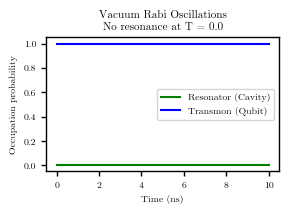

In [98]:
title = "No resonance"
plot_prob(result_no_res, title, temperature, save = True)

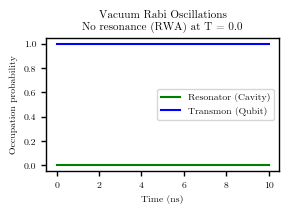

In [99]:
# Plot of the results in the RWA
title = "No resonance (RWA)"
plot_prob(result_RWA_no_res, title, temperature, save = True)

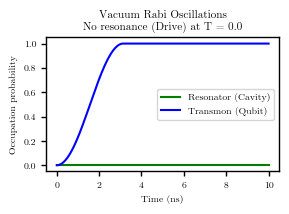

In [100]:
title = "No resonance (Drive)"
plot_prob(result_Drive_no_res, title, temperature, save = True) 

---
### System evolution with different frequencies

In [101]:
# Defining the Hamiltonian for the different frequencies configuration
hamiltonian_gen(w_R, w_T = 0.3 * w_R, g = 0.2 * 2 * np.pi)

In [ ]:
# Solving the master equation for the Hamiltonians
result_diff_freq = mesolve(H, psi_1, t, e_ops = [a.dag() * a, sigma_minus.dag() * sigma_minus])
result_RWA_diff_freq = mesolve(H_RWA, psi_1, t, e_ops = [a.dag() * a, sigma_minus.dag() * sigma_minus])
result_Drive_diff_freq = hamiltonian_Drive_solver(w_R=w_R, w_T=0.3*w_R, g=g, t=t, w_D=w_T, A=2*np.pi*0.160
                                                  , psi_0=psi_0, c_op_list=None)

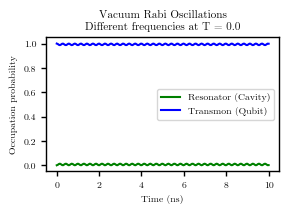

In [103]:
title = "Different frequencies"
plot_prob(result_diff_freq, title, temperature, save = True)

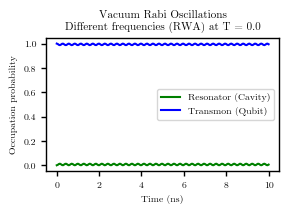

In [104]:
# Plot of the results in the RWA
title = "Different frequencies (RWA)"
plot_prob(result_RWA_diff_freq, title, temperature, save = True)

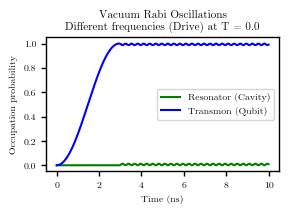

In [105]:
# Plot of the results in the driven system
title = "Different frequencies (Drive)"
plot_prob(result_Drive_diff_freq, title, temperature, save = True)

---
### System evolution with no dissipative interactions

In [ ]:
"""
Configuration: Ideal Resonant Coupling (No Dissipation)

This is the textbook scenario for vacuum Rabi oscillations:
- Cavity and qubit on resonance: ω_T = ω_R
- Coupling enabled: g ≠ 0
- No dissipation: closed quantum system (no collapse operators)

Expected Behavior:
- Perfect sinusoidal energy exchange between cavity and qubit
- Rabi frequency: Ω_R ≈ 2g (in single-excitation manifold)
- Oscillations continue indefinitely (no damping)
- Conservation of total excitation: ⟨a†a⟩ + ⟨σ₊σ₋⟩ = 1
"""

# Set to resonance and enable coupling
hamiltonian_gen(w_R, w_T=w_R, g=g)

In [ ]:
# Solving the master equation for the Hamiltonians
result = mesolve(H, psi_1, t, e_ops = [a.dag() * a, sigma_minus.dag() * sigma_minus])
result_RWA = mesolve(H_RWA, psi_1, t, e_ops = [a.dag() * a, sigma_minus.dag() * sigma_minus])
result_Drive = hamiltonian_Drive_solver(w_R = w_R, w_T = w_T, g = g, t = t, w_D = w_T, 
                                        A = 2*np.pi*0.160, psi_0 = psi_0, c_op_list = None)

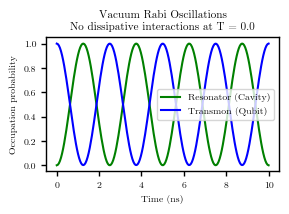

In [108]:
# Plot of the results
title = "No dissipative interactions"
plot_prob(result, title, temperature, save = True)

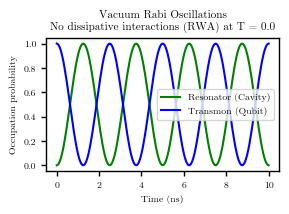

In [109]:
# Plot of the results in the RWA
title = "No dissipative interactions (RWA)"
plot_prob(result_RWA, title, temperature, save = True)

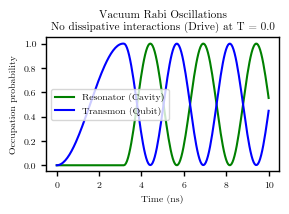

In [110]:
# Plot of the results in the driven system
title = "No dissipative interactions (Drive)"
plot_prob(result_Drive, title, temperature, save = True)

---
### System evolution with dissipative interactions

In [ ]:
"""
Configuration: Realistic System with Dissipation

This scenario includes the effects of the environment:
- Resonant condition maintained: ω_T = ω_R
- Coupling enabled: g ≠ 0  
- Dissipation included: cavity photon loss (κ) and qubit decay (γ)

Expected Behavior:
- Damped Rabi oscillations (exponential envelope decay)
- Energy lost to environment over time
- Eventually both subsystems return to ground state
- Decay rates: cavity (T_cavity = 1/κ), qubit (T1 = 1/γ)
- Realistic model of experimental observations
"""

# Same resonant configuration, but dissipation will be added
hamiltonian_gen(w_R, w_T=w_R, g=g)

In [ ]:
"""
Solving Dynamics with Dissipation

The master equation (Lindblad form) is solved including collapse operators.
This describes an open quantum system coupled to a Markovian environment.

Master Equation: dρ/dt = -i[H,ρ] + Σᵢ κᵢ(LᵢρLᵢ† - ½{Lᵢ†Lᵢ, ρ})

where Lᵢ are the collapse operators defined earlier.
"""

# Solve with dissipation: note the c_ops parameter
result_diss = mesolve(
    H, psi_1, t, 
    e_ops=[a.dag() * a, sigma_minus.dag() * sigma_minus], 
    c_ops=c_op_list
)

result_RWA_diss = mesolve(
    H_RWA, psi_1, t, 
    e_ops=[a.dag() * a, sigma_minus.dag() * sigma_minus], 
    c_ops=c_op_list
)

result_Drive_diss = hamiltonian_Drive_solver(
    w_R=w_R, w_T=w_T, g=g, t=t, w_D=w_T, 
    A=2*np.pi*0.160, psi_0=psi_0, c_op_list=c_op_list
)

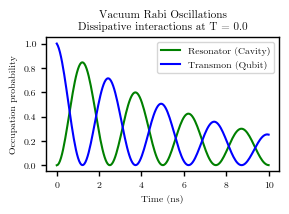

In [113]:
# Plot of the results
title = "Dissipative interactions"
plot_prob(result_diss, title, temperature, save = True)

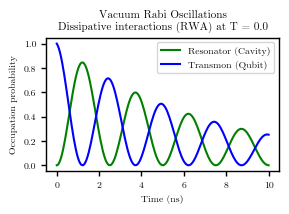

In [114]:
# Plot of the results in the RWA
title = "Dissipative interactions (RWA)"
plot_prob(result_RWA_diss, title, temperature, save = True)

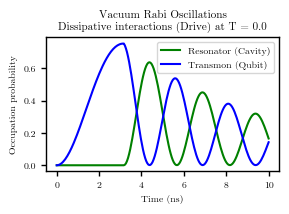

In [115]:
# Plot of the results in the driven system
title = "Dissipative interactions (Drive)"
plot_prob(result_Drive_diss, title, temperature, save = True)

---
### System evolution with frequency detuning

The following analysis consists in obtaining the behavior of the system with a time-dependent Hamiltonian in which the frequency $\omega_T$ is detuned in relation to $\omega_R$. The detuning parameter modifies the transmon frequency to analyze the coupling strength.

#### Heaviside detuning
The first evaluation consists in varying $\omega_T$ in a heaviside format, with a predetermined time interval for the interaction.

In [124]:
# Defining the Hamiltonians for the frequency detuning configuration
hamiltonian_gen(w_R, w_T = w_R, g = g)

In [ ]:
"""
Time-Dependent Detuning: Heaviside Step Function

This function implements a "switch-on" protocol where the qubit frequency
suddenly changes at time t_min, turning on the resonant interaction.

Protocol:
1. t < t_min: Large detuning (no interaction)
2. t_min < t < t_max: On resonance (interaction enabled)
3. t > t_max: Return to large detuning (interaction off)

This models pulsed experiments where interaction is controlled by frequency.
"""

# Initial detuning factor (qubit far off resonance)
initial_detuning = 0.2


def H_w_T_coeff_heaviside(t: float, args: dict) -> float:
    """
    Heaviside coefficient for time-dependent qubit frequency.
    
    Parameters
    ----------
    t : float
        Current time
    args : dict
        Must contain 'detuning' (on-resonance value), 
        't_min' (start time), 't_max' (end time)
    
    Returns
    -------
    float
        Frequency coefficient at time t
    """
    if t < args["t_min"] or t > args["t_max"]:
        return initial_detuning  # Off resonance
    else:
        return args["detuning"]  # On resonance

In [126]:
# Defining the interaction parameters
t_min = 2
delta_t = 1
H_variation = [H_R, [H_T, H_w_T_coeff_heaviside], H_g]
args={"detuning": 1, "t_min": t_min, "t_max": t_min + delta_t}
qevo = QobjEvo(H_variation, args=args)

In [127]:
result_variation_1 = mesolve(qevo, psi_1, t, e_ops = [a.dag() * a, sigma_minus.dag() * sigma_minus])
result_variation_diss_1 = mesolve(qevo, psi_1, t, c_op_list, [a.dag() * a, sigma_minus.dag() * sigma_minus])

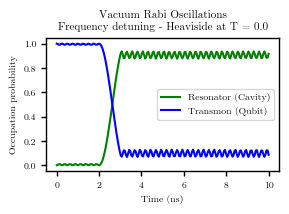

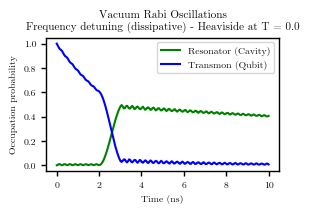

In [128]:
title = "Frequency detuning - Heaviside"
plot_prob(result_variation_1, title, temperature, save = True)

title = "Frequency detuning (dissipative) - Heaviside"
plot_prob(result_variation_diss_1, title, temperature, save = True)

#### Gaussian detuning
The second evaluation consists in varying $\omega_T$ in a gaussian format with, with a predetermined time interval for the interaction. The gaussian shape has its peak at the middle of the timescale analyzed. 

In [ ]:
"""
Time-Dependent Detuning: Gaussian Pulse

This function implements a smooth frequency sweep using a Gaussian envelope.
More realistic than Heaviside: avoids sudden frequency jumps that could
excite unwanted transitions or violate adiabatic conditions.

Gaussian form: detuning(t) = detuning₀ × exp[-(t-t_middle)²/σ²]

The interaction is strongest at t = t_middle and smoothly turns on/off.
"""

# Center time for Gaussian pulse
t_middle = 5


def H_w_T_coeff_gaussian(t: float, args: dict) -> float:
    """
    Gaussian coefficient for time-dependent qubit frequency.
    
    Creates a smooth, symmetric frequency pulse centered at t_middle.
    
    Parameters
    ----------
    t : float
        Current time
    args : dict
        Must contain 'detuning' (peak amplitude) and 'sigma' (pulse width)
    
    Returns
    -------
    float
        Frequency coefficient at time t (Gaussian envelope)
    """
    return args["detuning"] * np.exp(-((t - t_middle) / args['sigma'])**2)

In [130]:
# Defining the interaction parameters
H_variation = [H_R, [H_T, H_w_T_coeff_gaussian], H_g]
args={"detuning": 1.0, "sigma": 2}
qevo = QobjEvo(H_variation, args=args)

In [131]:
result_variation_2 = mesolve(qevo, psi_1, t, e_ops = [a.dag() * a, sigma_minus.dag() * sigma_minus])
result_variation_diss_2 = mesolve(qevo, psi_1, t, c_op_list, [a.dag() * a, sigma_minus.dag() * sigma_minus])

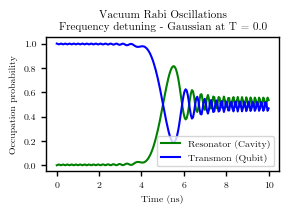

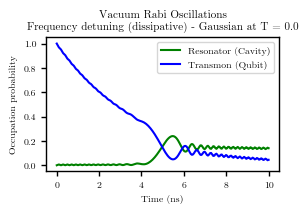

In [132]:
title = "Frequency detuning - Gaussian"
plot_prob(result_variation_2, title, temperature, save = True)

title = "Frequency detuning (dissipative) - Gaussian"
plot_prob(result_variation_diss_2, title, temperature, save = True)

#### Vacuum Rabi Graph

**Vacuum Rabi Graph Generation**

This section generates a 2D map showing how the final qubit excitation probability depends on:
- **Frequency detuning** (x-axis): How far off-resonance the qubit is
- **Interaction time** (y-axis): How long the resonant interaction lasts

**Physical Interpretation:**
- Bright regions: High probability of finding qubit excited
- Dark regions: Energy transferred to cavity (qubit de-excited)
- Vertical striations at detuning=0: Rabi oscillations at resonance
- Width of resonance: Coupling strength determines how sensitive to detuning

**Computational Cost:**
The default resolution (100×100 = 10,000 simulations) takes approximately 2-3 hours.
For faster exploration, reduce `resolution` to 20-50.

In [ ]:
"""
Vacuum Rabi Graph Computation: Parameter Sweep

This cell performs a systematic parameter sweep over detuning and interaction time.
For each combination, it solves the master equation and records the final qubit state.

WARNING: High computational cost! 
- Default: 100×100 grid = 10,000 simulations ≈ 2-3 hours
- For testing: reduce resolution to 20-50 (runtime scales as resolution²)

Algorithm:
1. Define parameter ranges (detuning, interaction duration)
2. For each parameter combination:
   a. Set up time-dependent Hamiltonian with Heaviside detuning
   b. Solve master equation
   c. Record final qubit excitation probability
3. Store results in 2D array for visualization
"""

# ============================================================================
# Parameter Space Definition
# ============================================================================
resolution = 100  # Grid points in each dimension (100 x 100 = 10,000 runs)

# Time evolution parameters
t = np.linspace(0, 100, 5000)  # Extended time range for long interactions

# Interaction duration sweep (0 to 100 ns)
delta_t_list = np.linspace(0, 100, resolution)

# Frequency detuning sweep (±0.03×2π GHz ≈ ±190 MHz)
# This range captures the resonance width
delta_freq_list = np.linspace(-0.03*2*np.pi, 0.03*2*np.pi, resolution)

# Result storage: z_result[i,j] = P_excited(delta_t[i], delta_freq[j])
z_result = np.zeros((len(delta_t_list), len(delta_freq_list)))

# ============================================================================
# System Configuration
# ============================================================================
# Weak coupling regime for clear resonance feature
hamiltonian_gen(w_R, w_T=w_R, g=0.005 * 2*np.pi)
t_min = 1  # Start interaction at 1 ns (after transients)

# ============================================================================
# Parameter Sweep Loop
# ============================================================================
for delta_t in delta_t_list:
    for delta_freq in delta_freq_list:
        # ====================================================================
        # Define Time-Dependent Qubit Frequency
        # ====================================================================
        def H_w_T_coeff_heaviside(t: float, args: dict) -> float:
            """
            Frequency coefficient with Heaviside switching.
            
            Before/after interaction: qubit far detuned (-w_T/4)
            During interaction: qubit at w_R + delta_freq
            """
            if t < args["t_min"] or t > args["t_max"]:
                return -w_T / 4  # Far off resonance (no interaction)
            else:
                return -(w_R + delta_freq) / 2  # Near resonance

        # Build time-dependent Hamiltonian
        H_variation = [H_R, [sigma_z, H_w_T_coeff_heaviside], H_g]
        args = {"t_min": t_min, "t_max": t_min + delta_t}
        qevo = QobjEvo(H_variation, args=args)

        # ====================================================================
        # Solve Dynamics
        # ====================================================================
        result = mesolve(
            qevo, psi_1, t, 
            e_ops=[sigma_minus.dag() * sigma_minus]
        )

        # ====================================================================
        # Store Final Excitation Probability
        # ====================================================================
        z_result[
            np.where(delta_t_list == delta_t), 
            np.where(delta_freq_list == delta_freq)
        ] = result.expect[0][-1]  # Final time value

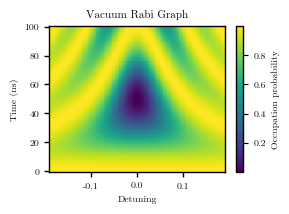

In [ ]:
"""
Vacuum Rabi Graph Visualization

Creates a 2D color map (pseudocolor plot) showing the vacuum Rabi splitting
and oscillation dynamics as a function of detuning and interaction time.

Key Features to Observe:
- Resonance at detuning = 0 (bright vertical stripe)
- Rabi oscillations along time axis at resonance
- Resonance width proportional to coupling strength g
- Avoided crossing structure (characteristic of strong coupling)
"""

# ============================================================================
# Figure Configuration (Publication Quality)
# ============================================================================
figSizeXcm = 7.6
aspectRatio = 4.0 / 3.0
figSizeYcm = figSizeXcm / aspectRatio
figSizeXinches = figSizeXcm / 2.54
figSizeYinches = figSizeYcm / 2.54

# Typography settings
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.unicode_minus'] = False  # Display minus signs properly

# ============================================================================
# Create 2D Color Plot
# ============================================================================
fig, ax = plt.subplots(figsize=(figSizeXinches, figSizeYinches))

# Pseudocolor mesh plot (pcolormesh is efficient for large grids)
mesh = plt.pcolormesh(
    delta_freq_list,  # x-axis: frequency detuning
    delta_t_list,     # y-axis: interaction time
    z_result,         # color: excitation probability
    shading='auto',   # Smooth interpolation
    cmap='viridis'    # Perceptually uniform colormap
)

# ============================================================================
# Labels and Formatting
# ============================================================================
ax.set_xlabel("Detuning (rad/ns)", fontsize=7)
ax.set_ylabel('Interaction Time (ns)', fontsize=7)

# Colorbar with label
cbar = plt.colorbar(mesh)
cbar.set_label('Qubit Excitation Probability', fontsize=7)
cbar.ax.tick_params(labelsize=7)

ax.set_title("Vacuum Rabi Graph: Resonance Structure", fontsize=8)

# Tick formatting
ax.xaxis.set_tick_params(width=1.0)
ax.yaxis.set_tick_params(width=1.0)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=7)

# ============================================================================
# Display and Save
# ============================================================================
plt.tight_layout()
plt.show()

# Save high-resolution figure
import os
os.makedirs('./images', exist_ok=True)
fig.savefig("./images/Vacuum Rabi Graph.pdf", dpi=300, bbox_inches='tight')

---
# TEST CELLS
---

In [40]:
# Defining the coefficient function fot the Time-Dependent Hamiltonian
#def H_w_T_coeff(t, args):
#    return args["detuning"]*np.exp(-((t-25)/args['sigma'])**2)

# Heaviside Test
def H_w_T_coeff_test(t, args):
    if t < args["t_min"] or t > args["t_max"]:
        return 0.1
    else:
        return args["detuning"]


In [41]:
# TEST
t_min = 20
delta_t = 5
H_variation = [H_R, [H_T, H_w_T_coeff_test], H_g]
args={"detuning": 1, "t_min": t_min, "t_max": t_min + delta_t}
qevo = QobjEvo(H_variation, args=args)

In [42]:
# Define a list of Time-Dependent Hamiltonians with different detuning values
# Define a list of Time-Dependent Hamiltonians with different sigma values
steps = 5
t_min = 5
amplitude_list = np.zeros((steps, steps))
detuning_list = np.linspace(0.95, 1.05, steps)
delta_t_list = np.linspace(1, 5, steps)

# For 10 x 10 = 20 s

# Create a list of results for each Time-Dependent Hamiltonian
# Create a list with the amplitude value for the expectation value of the cavity operator for each result
for d in detuning_list:
    for dt in delta_t_list:
        args={"detuning": d, "t_min": t_min, "t_max": t_min + dt}
        qevo = QobjEvo(H_variation, args=args)
        temp_result = mesolve(qevo, psi_1, t, e_ops = sigma_minus.dag() * sigma_minus).expect[0][-1]
        amplitude_list[np.where(detuning_list == d), np.where(delta_t_list == dt)] = temp_result

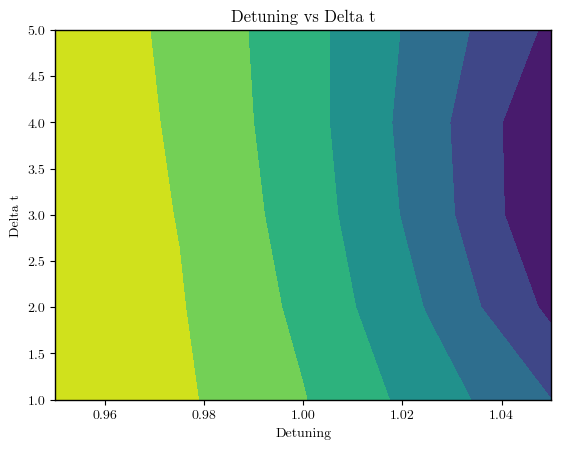

In [43]:
# Plot of a contour plot with the max values (color) for each detuning value (x-axis) for each sigma value (y-axis)
fig, ax = plt.subplots()
ax.contourf(detuning_list, delta_t_list, amplitude_list, cmap='viridis')
ax.set_xlabel('Detuning')
ax.set_ylabel('Delta t')
ax.set_title('Detuning vs Delta t')
plt.show()


In [63]:
t = np.linspace(0, 200, 400)
delta_t_list = np.linspace(0, 200, 10)
delta_freq_list = np.linspace(-0.03*2*np.pi, 0.03*2*np.pi, 10)
z_result = np.zeros((len(delta_t_list), len(delta_freq_list)))

hamiltonian_gen(w_R, w_T = w_R, g = 0.005 * 2*np.pi)
t_min = 1

for delta_t in delta_t_list:
    for delta_freq in delta_freq_list:
        def H_w_T_coeff_heaviside(t, args):
            if t < args["t_min"] or t > args["t_max"]:
                return -w_T/4
            else:
                return -(w_R + delta_freq)/2            

        H_variation = [H_R, [sigma_z, H_w_T_coeff_heaviside], H_g]
        args={"t_min": t_min, "t_max": t_min + delta_t}
        qevo = QobjEvo(H_variation, args=args)

        result = sesolve(qevo, psi_1, t, e_ops = [sigma_minus.dag() * sigma_minus])

        z_result[np.where(delta_t_list == delta_t), np.where(delta_freq_list == delta_freq)] = result.expect[0][-1]

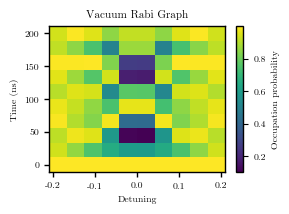

In [64]:
figSizeXcm = 7.6
aspectRatio = 4.0/3.0
figSizeYcm = figSizeXcm/aspectRatio
figSizeXinches = figSizeXcm/2.54
figSizeYinches = figSizeYcm/2.54
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(figSizeXinches, figSizeYinches))
plt.pcolormesh(delta_freq_list, delta_t_list, z_result)
ax.set_xlabel("Detuning", fontsize=7)
ax.set_ylabel('Time (ns)', fontsize=7)
# Set label to color bar
cbar = plt.colorbar()
cbar.set_label('Occupation probability', fontsize=7)
cbar.ax.tick_params(labelsize=7)
ax.set_title(f"Vacuum Rabi Graph", fontsize=8)
ax.xaxis.set_tick_params(width=1.0)
ax.yaxis.set_tick_params(width=1.0)
#plt.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=7)
#ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

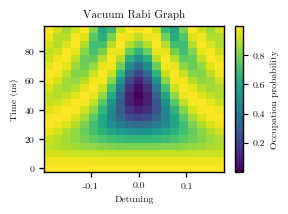

In [15]:
figSizeXcm = 7.6
aspectRatio = 4.0/3.0
figSizeYcm = figSizeXcm/aspectRatio
figSizeXinches = figSizeXcm/2.54
figSizeYinches = figSizeYcm/2.54
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(figSizeXinches, figSizeYinches))
plt.pcolormesh(delta_freq_list, delta_t_list, z_list_reshaped)
ax.set_xlabel("Detuning", fontsize=7)
ax.set_ylabel('Time (ns)', fontsize=7)
# Set label to color bar
cbar = plt.colorbar()
cbar.set_label('Occupation probability', fontsize=7)
cbar.ax.tick_params(labelsize=7)
ax.set_title(f"Vacuum Rabi Graph", fontsize=8)
ax.xaxis.set_tick_params(width=1.0)
ax.yaxis.set_tick_params(width=1.0)
#plt.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=7)
ax.tick_params(axis='both', which='minor', labelsize=7)
#ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

---
### System evolution with non-zero temperature

In [164]:
# Defining the Hamiltonians for the non-zero temperature configuration
hamiltonian_gen(w_R, w_T = w_R, g = g)

In [165]:
temperature = 1

c_op_list = c_op_gen(kappa, gamma, temperature)

# Solving the master equation for the Hamiltonians
result_non_zero_temp = mesolve(H, psi_1, t, e_ops = [a.dag() * a, sigma_minus.dag() * sigma_minus], c_ops = c_op_list)
result_RWA_non_zero_temp = mesolve(H_RWA, psi_1, t, e_ops = [a.dag() * a, sigma_minus.dag() * sigma_minus], c_ops = c_op_list)
result_Drive_non_zero_temp = hamiltonian_Drive_solver(w_R = w_R, w_T = w_T, g = g, t = t, w_D = w_T, A = 1, psi_0 = psi_0, c_op_list = c_op_list)

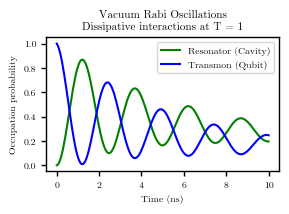

In [166]:
# Plot of the results
title = "Dissipative interactions"
plot_prob(result_non_zero_temp, title, temperature, save = True)

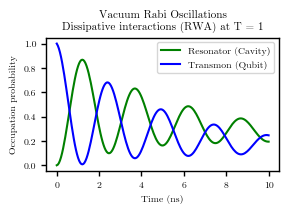

In [167]:
# Plot of the results in the RWA
title = "Dissipative interactions (RWA)"
plot_prob(result_RWA_non_zero_temp, title, temperature, save = True)

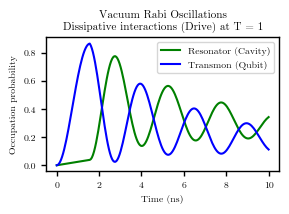

In [168]:
# Plot of the results in the driven system
title = "Dissipative interactions (Drive)"
plot_prob(result_Drive_non_zero_temp, title, temperature, save = True)

---
# Summary and Extensions
---

## Key Results from This Notebook

This computational study has demonstrated:

1. **Vacuum Rabi Oscillations**: Coherent energy exchange between cavity and qubit in the strong coupling regime (g >> κ, γ)

2. **Role of Detuning**: Interaction strength depends critically on frequency matching (resonance condition)

3. **Dissipation Effects**: Realistic systems exhibit damped oscillations due to photon loss and qubit decay

4. **Drive Protocols**: Different excitation methods (matrix, pulse, drive Hamiltonian) produce equivalent dynamics

5. **Time-Dependent Control**: Frequency detuning provides a mechanism for controlling interaction timing

6. **Vacuum Rabi Splitting**: The characteristic resonance structure emerges from parameter sweeps

---

## Experimental Connection

These simulations correspond to circuit QED experiments:
- **Cavity**: Superconducting transmission line resonator (5-10 GHz)
- **Transmon**: Cooper-pair box in the transmon regime (large E_J/E_C ratio)
- **Coupling**: Capacitive coupling between qubit and cavity
- **Readout**: Dispersive measurement of cavity transmission/reflection

Typical experimental parameters match those used here:
- ω_R/2π ≈ 7 GHz (cavity)
- ω_T/2π ≈ 5-7 GHz (tunable transmon)
- g/2π ≈ 50-200 MHz (strong coupling)
- κ/2π ≈ 1-100 MHz (cavity decay)
- γ/2π ≈ 0.1-1 MHz (qubit decay, T1 = 10-100 μs)

---

## Suggested Extensions

This notebook can be extended to explore:

### 1. Multi-Photon Dynamics
Increase Fock space dimension and study multi-excitation manifolds:
```python
N = 20  # Larger Hilbert space
psi_0 = tensor(fock(N, 2), fock(2, 0))  # Start with 2 photons
```

### 2. Two-Qubit Systems
Model two transmons coupled to one cavity:
```python
N_qubits = 2
operators = [destroy(N)] + [destroy(2) for _ in range(N_qubits)]
```

### 3. Dephasing (T2 Processes)
Add pure dephasing collapse operator:
```python
c_op_list.append(np.sqrt(gamma_phi) * sigma_z)
```

### 4. Dispersive Regime
Explore large detuning regime (|Δ| >> g) for quantum non-demolition readout:
```python
hamiltonian_gen(w_R, w_T=w_R + 10*g, g=g)  # Large detuning
```

### 5. Adiabatic State Transfer
Implement slow frequency sweeps through resonance:
```python
def adiabatic_sweep(t, args):
    return args['w_start'] + (args['w_end'] - args['w_start']) * t / args['t_total']
```

### 6. Pulsed Experiments
Model realistic pulse sequences (Gaussian, DRAG, etc.):
```python
def gaussian_pulse(t, t0, sigma, amplitude):
    return amplitude * np.exp(-(t - t0)**2 / (2 * sigma**2))
```

### 7. Quantum State Tomography
Reconstruct the density matrix at various time points:
```python
result = mesolve(H, psi_0, t, c_ops=c_op_list, options={'store_states': True})
rho = result.states[-1]  # Final density matrix
```

---

## References for Further Study

**QuTiP Documentation:**
- http://qutip.org/docs/latest/
- Tutorials: http://qutip.org/tutorials.html

**Circuit QED Reviews:**
- Blais et al., "Circuit quantum electrodynamics", Rev. Mod. Phys. **93**, 025005 (2021)
- Gu et al., "Microwave photonics with superconducting quantum circuits", Phys. Rep. **718-719**, 1 (2017)

**Superconducting Qubits:**
- Krantz et al., "A quantum engineer's guide to superconducting qubits", Appl. Phys. Rev. **6**, 021318 (2019)

---

## Acknowledgments

Simulations performed using QuTiP (Quantum Toolbox in Python).

**Citation:** J. R. Johansson, P. D. Nation, and F. Nori, *Comp. Phys. Comm.* **183**, 1760 (2012); **184**, 1234 (2013)

---

*End of Computational Supplement*